# **Clase 3 - Introducción a los modelos de regulación génica**

## Temas

- Solución a la tarea 1
- Ecuación diferencial sobre expresión génica cuando los niveles de mRNA no cambian en el tiempo
- Tipos de regulación génica (No regulada, por represión, por activación)
- Cómo definir funciones en Python
- La función de Hill para expresión génica (por activación y por represión)

# Expresión génica cuando solamente 

$$\frac{d[mRNA]}{dt}=0$$

Recordemos de la clase anterior que en una célula las concentraciones de mRNA y de Proteína varían de acuerdo a las siguientes ecuaciones

$$\frac{d[mRNA]}{dt}= \beta_m - \alpha_m[mRNA]$$

$$\frac{d[Proteina]}{dt}= \beta_p[mRNA] - \alpha_p[Proteina]$$

Si asumimos que la concentración de mRNA se encuentra en equilibrio, entonces

$$[mRNA] = \frac{\beta_m}{\alpha_m}$$

Por lo que la ecuación diferencial para modelar la tasa de cambio en la concentración de proteína queda como:

$$\frac{d[Proteina]}{dt}= \frac{\beta_p \beta_m}{\alpha_m} - \alpha_p[Proteina]$$

$$\frac{d[Proteina]}{dt}= \gamma - \alpha_p[Proteina]$$

Donde $\gamma$ es la tasa de expresión

### **Ésta última ecuación, ¿a qué otra ecuación diferencial de la clase anterior se parece?**

# Tipos de expresión génica

1. No regulada

2. Por activacion

3. Por represion

# Cómo definir funciones en Python

In [25]:
# Ejemplo 1, define una funcion que calcula el cuadrado de X
def cuadrado(X):
    return X**2

In [26]:
# Pon a prueba la nueva funcion
cuadrado(8)

64

In [36]:
# Ejemplo 2, define una funcion que toma dos numeros y regresa su suma
def suma(X,Y):
    return X + Y

In [37]:
# Pon a prueba la nueva funcion
suma(3,10)

13

In [38]:
# Ejemplo 3, define una funcion que calcula la concentracion de una proteina en estado estable
# dados los numeros en el espacio de Crick
def concProt(am, ap, bm, bp):
    return (bm * bp)/(am * ap)

In [39]:
# Pon a prueba la nueva funcion
concProt(100.0,5.0,200.0,10.0)

4.0

# Ejercicios en clase

### Define funciones en Python que hagan lo siguiente:

- Define una funcion llamada **cubo** que tome como entrada un numero X y regrese su valor al cubo

- Define una funcion llamada **promed** que tome 5 numeros como entrada y regrese su promedio

- Define una funcion llamada **ultimaLetra** que tome cualquier palabra como entrada (por ejemplo 'CUCEI') y regrese la ultima letra de la palabra

- Define una funcion llamada **gamma** que calcule el valor de $\gamma$ dados los valores de $\alpha_m,\beta_m,\beta_p$

- Define una funcion llamada **dPdt** que tome como entrada los valores de $\alpha_m,\alpha_p,\beta_m,\beta_p , [Proteina]$ para calcular el valor de $\frac{dP}{dt}$

- Define una funcion llamada **Nveces** que tome como entrada un numero N y una palabra P. La funcion debe imprimir (usando la funcion **print**) la palabra P un total de N veces

# La función de Hill para expresión génica por activación

Si la expresión del gen X activa la expresión del gen Y, entonces:

$$X \longrightarrow Y$$

Asumiendo que X se encuentra en uno de dos posibles estados (activa e inactiva), la ecuación de Hill que relaciona las cantidades de ambas proteínas es:

$$Y = f(X_{act}) = \frac{\beta X_{act}^n}{K^n + X_{act}^n}$$

Donde:

- $X_{act}$ es la concentración de **X en su forma activa**

- $\beta$ Es el **valor máximo de expresión** que el gen Y puede alcanzar

- $K$ es el **coeficiente de activación** y determina qué tanto del gen $X$ debe haber para alcanzar al menos **la mitad de $\beta$** (Observa lo que pasa al calcular $f(X_{act} = K)$

- $n$ es el **coeficiente de Hill** y dice con qué afinidad las moleculas de X cooperan entre sí para activar Y

## Biológicamente hablando, ¿de qué dependen los valores de $\beta, K, n$?

Discusión en clase

# Gráfica de la función de Hill en Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define una funcion que calcula el valor de la funcion de Hill dadas X, B, K y n
def HillActivacion(X,B,K,n):
    return (B*(X**n))/((K**n) + (X**n))

In [19]:
# Grafica de la funcion de Hill por activación cuando n = 1,2, 4, y 10
b = 1.0
k = 1.0
x = np.linspace(0,2)

# Define funciones de Y (y1, y2, y4, y10)
y1 = HillActivacion(x,b,k,1)
y2 = HillActivacion(x,b,k,2)
y4 = HillActivacion(x,b,k,4)
y10 = HillActivacion(x,b,k,10)

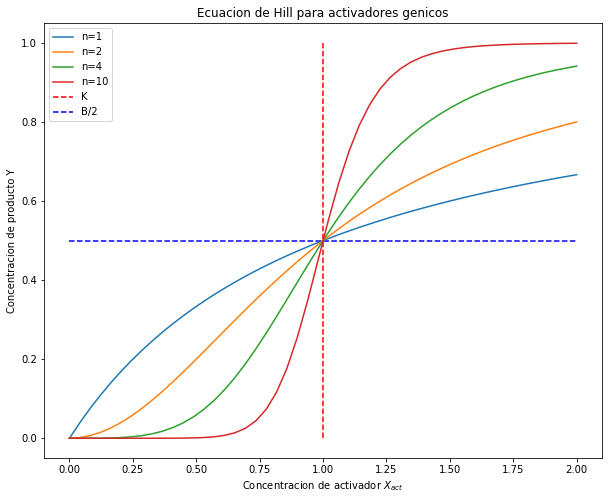

In [21]:
# Grafica las 4 funciones
plt.figure(figsize=(10,8))
plt.plot(x,y1,label='n=1')
plt.plot(x,y2,label='n=2')
plt.plot(x,y4,label='n=4')
plt.plot(x,y10,label='n=10')
plt.vlines(k,0,1,colors='r',linestyles='dashed',label='K')
plt.hlines(b/2,0,2,colors='b',linestyles='dashed',label='B/2')
plt.xlabel('Concentracion de activador $X_{act}$')
plt.ylabel('Concentracion de producto Y')
plt.title('Ecuacion de Hill para activadores genicos')
plt.legend()

# La función de Hill para expresión génica por represión

Si la expresión del gen X reprime la expresión del gen Y, entonces:

$$Y \vdash X$$

Asumiendo que X se encuentra en uno de dos posibles estados (activa e inactiva), la ecuación de Hill que relaciona las cantidades de ambas proteínas es:

$$Y = f(X_{act}) = \frac{\beta}{1 + \frac{X_{act}^n}{K^n}}$$

Donde:

- $X_{act}$ es la concentración de **X en su forma activa**

- $\beta$ Es el **valor máximo de expresión** que el gen Y puede alcanzar

- $K$ es el **coeficiente de represión** y determina qué tanto del gen $X$ debe haber para reprimir al menos **la mitad de $\beta$** (Observa lo que pasa al calcular $f(X_{act} = K)$

- $n$ es el **coeficiente de Hill** y dice con qué afinidad las moleculas de X cooperan entre sí para reprimir Y

In [22]:
# Define una funcion que calcula el valor de la funcion de Hill dadas X, B, K y n
def HillRepresion(X,B,K,n):
    return B/(1 + ((X**n)/(K**n)))

In [23]:
# Grafica de la funcion de Hill por represión cuando n = 1,2, 4, y 10
b = 1.0
k = 1.0
x = np.linspace(0,2)

# Define funciones de Y (y1, y2, y4, y10)
y1 = HillRepresion(x,b,k,1)
y2 = HillRepresion(x,b,k,2)
y4 = HillRepresion(x,b,k,4)
y10 = HillRepresion(x,b,k,10)

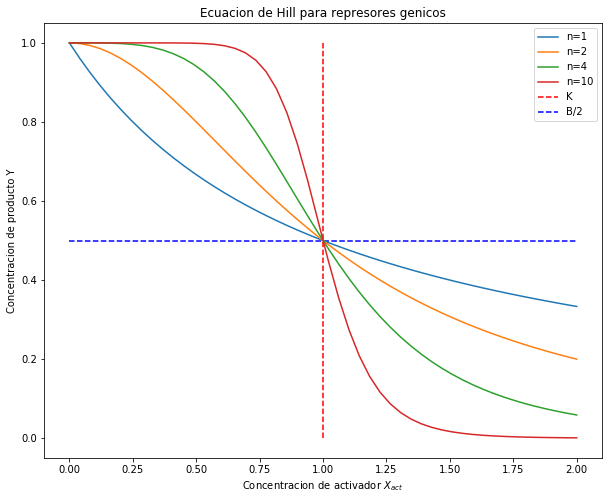

In [24]:
# Grafica las 4 funciones
plt.figure(figsize=(10,8))
plt.plot(x,y1,label='n=1')
plt.plot(x,y2,label='n=2')
plt.plot(x,y4,label='n=4')
plt.plot(x,y10,label='n=10')
plt.vlines(k,0,1,colors='r',linestyles='dashed',label='K')
plt.hlines(b/2,0,2,colors='b',linestyles='dashed',label='B/2')
plt.xlabel('Concentracion de activador $X_{act}$')
plt.ylabel('Concentracion de producto Y')
plt.title('Ecuacion de Hill para represores genicos')
plt.legend()

# La función de Hill se puede simplificar a una forma digital o binaria

¿Qué pasa si asumimos que el valor de $n$ es muy grande?

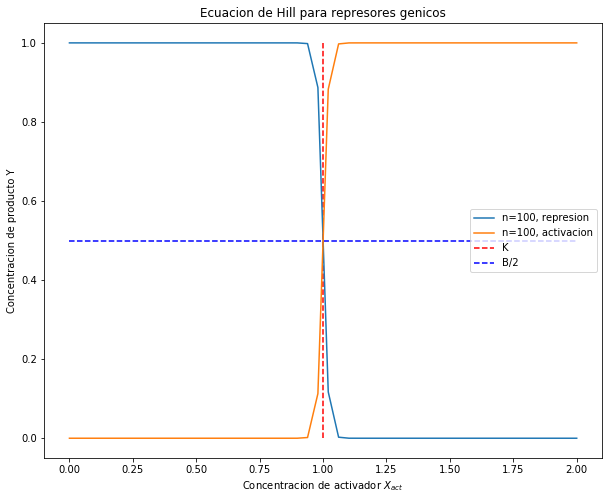

In [42]:
# Grafica de la funcion de Hill (activacion y represión) cuando n = 100
y100rep = HillRepresion(x,b,k,100)
y100act = HillActivacion(x,b,k,100)
# Grafica la funcion
plt.figure(figsize=(10,8))
plt.plot(x,y100rep,label='n=100, represion')
plt.plot(x,y100act,label='n=100, activacion')
plt.vlines(k,0,1,colors='r',linestyles='dashed',label='K')
plt.hlines(b/2,0,2,colors='b',linestyles='dashed',label='B/2')
plt.xlabel('Concentracion de activador $X_{act}$')
plt.ylabel('Concentracion de producto Y')
plt.title('Ecuacion de Hill para represores genicos')
plt.legend()

En este caso, podemos **simplificar** $f(X_{act})$ de la siguiente manera

$$f(X_{act})=\beta \theta (X_{act},K)$$

Donde $\theta(X_{act},K)$ es una función que es igual 1 si $X_{act} > K$ e igual a 0 en cualquier otro caso. Por lo que

Si $X_{act}>K$, entonces $f(X_{act}) = \beta$

Si $X_{act}<=K$, entonces $f(X_{act}) = 0$

# Y esto, ¿para qué sirve?

Para modelar regulación génica en forma de **compuertas lógicas**

### Ejemplo 1: La expresión del gen **Z** se activa por los genes **X** e **Y**

Esto se puede modelar con una compuerta lógica **AND**. Esto es, solamente si tanto X e Y están presentes (y activos), Z se expresa.

$$Z = f(X,Y) = \beta \theta(X_{act},K_X) \theta(Y_{act},K_Y)$$

$$(X\&Y) = Z$$

### Ejemplo 2: La expresión del gen **Z** se activa por el gen **X** o por le gen **Y**

Esto se puede modelar con una compuerta lógica **OR**. Esto es, ya sea si X, o Y, o ambos genes están presentes (y activos), Z se expresa.

$$Z = f(X,Y) = \beta\theta[(X_{act},K_X), OR, Y_{act},K_Y)]$$

$$(X|Y) = Z$$

### Ejemplo 3: No todos los genes tienen una función digital (o Booleana). Algunos genes responden de manera **aditiva**

$$f(X_{act},Y_{act}) = \beta_XX_{act} + \beta_YY_{act}$$

# Cascadas de regulación génica (ejercicio en clase)

### Ejercicio: Haz una gráfica en Python para la siguiente cascada de regulacion génica

$$X \longrightarrow Y \longrightarrow Z$$

### utilizando las siguientes dos funciones de Hill

$$Y = \frac{\beta_XX^n}{K_X^n + X^n}$$

$$Z = \frac{\beta_YY^n}{K_Y^n + Y^n}$$

Usa los siguientes valores:

- $X = [0.0,...,3.0]$ (variable independiente)
- $\beta_Y = \beta_Z = 1$
- $K_X = 1$
- $K_Y = 0.5$
- $n_X = n_Y = 3$

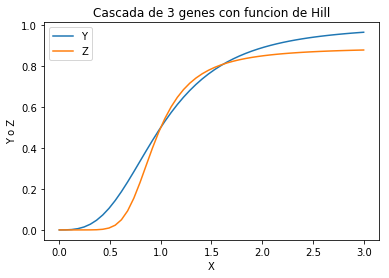

In [228]:
# Solucion
x = np.linspace(0,3)
By = 1.0
Bz = 1.0
Kx = 1.0
Ky = 0.5
n = 3

y = HillActivacion(x,By,Kx,n)
z = HillActivacion(y,Bz,Ky,n)

plt.plot(x,y,label='Y')
plt.plot(x,z,label='Z')
plt.xlabel('X')
plt.ylabel('Y o Z')
plt.title('Cascada de 3 genes con funcion de Hill')
plt.legend()

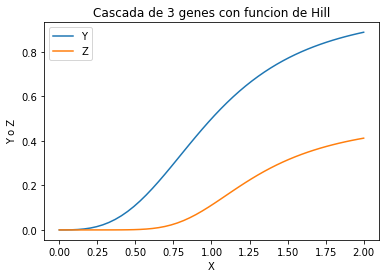

In [62]:
# Que pasa si Ky = 1
Ky = 1.0
y = HillActivacion(x,By,Kx,n)
z = HillActivacion(y,Bz,Ky,n)
plt.plot(x,y,label='Y')
plt.plot(x,z,label='Z')
plt.xlabel('X')
plt.ylabel('Y o Z')
plt.title('Cascada de 3 genes con funcion de Hill')
plt.legend()

# Cascada con retroalimentacion negativa

$$X \longrightarrow Y \longrightarrow Z$$

$$X \vdash Z$$

In [217]:
# Define constantes
Bx = 2.0
By = 1.0
Bz = 1.0
Kx = 1.0
Ky = 0.5
Kz = 0.5
n = 2.0
t = np.linspace(0,100)
ax = 0.05 # Tasa constante de produccion de X

# Inicializa los valores de X, Y, Z
x = np.zeros_like(t)
y = np.zeros_like(t)
z = np.zeros_like(t)

In [218]:
for i in range(1,len(t)):
    x[i] = x[i-1] + ax - (Bx - HillRepresion(z[i-1],Bx,Kz,n))
    y[i] = HillActivacion(x[i-1],By,Kx,n)
    z[i] = HillActivacion(y[i-1],Bz,Ky,n)

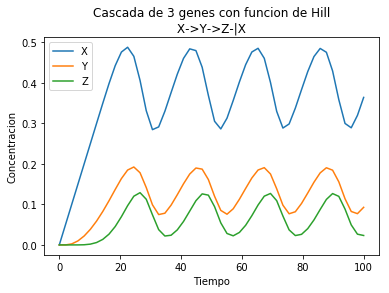

In [219]:
# Grafica
plt.plot(t,x,label='X')
plt.plot(t,y,label='Y')
plt.plot(t,z,label='Z')
plt.xlabel('Tiempo')
plt.ylabel('Concentracion')
plt.title('Cascada de 3 genes con funcion de Hill\n X->Y->Z-|X ')
plt.legend()